In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

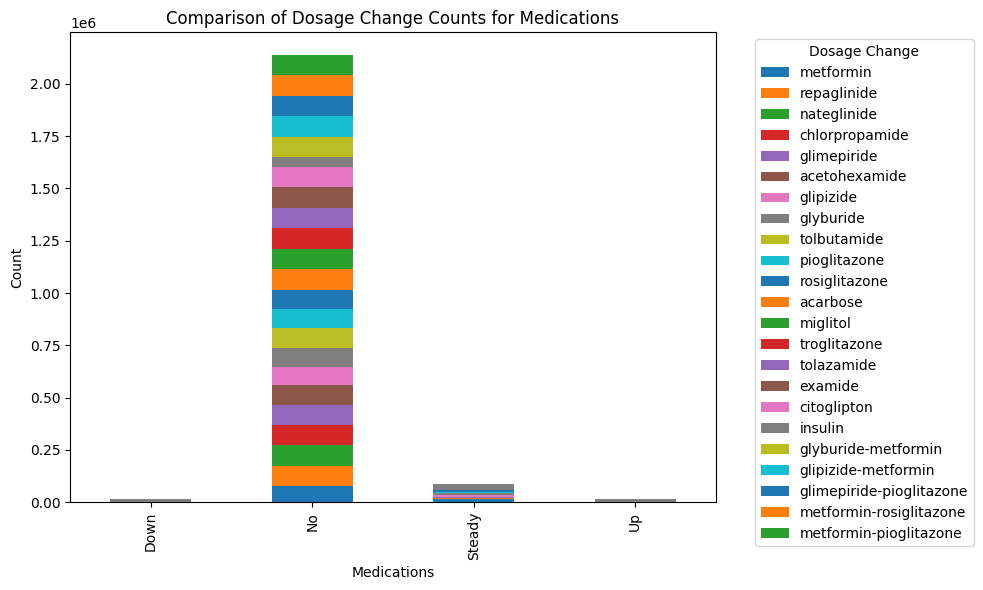

In [10]:
import matplotlib.pyplot as plt

df = pd.read_csv("../data/diabetic_data_cleaned.csv")  # Replace with your actual file
medication_list = ["metformin", "repaglinide", "nateglinide",
                   "chlorpropamide", "glimepiride", "acetohexamide",
                   "glipizide", "glyburide", "tolbutamide", "pioglitazone",
                   "rosiglitazone", "acarbose", "miglitol", "troglitazone",
                   "tolazamide", "examide", "citoglipton", "insulin",
                   "glyburide-metformin", "glipizide-metformin",
                   "glimepiride-pioglitazone", "metformin-rosiglitazone",
                   "metformin-pioglitazone"]
medication_counts = {}

# Collect the counts for each medication
for medication in medication_list:
    counts = df[medication].value_counts()
    medication_counts[medication] = counts

# Convert the dictionary into a DataFrame for easier plotting
counts_df = pd.DataFrame(medication_counts)

# Plotting
counts_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Comparison of Dosage Change Counts for Medications')
plt.xlabel('Medications')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Dosage Change', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

medication_list = [
    "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide",
    "glipizide", "glyburide", "tolbutamide", "pioglitazone",
    "rosiglitazone", "acarbose", "miglitol", "troglitazone",
    "tolazamide", "examide", "citoglipton", "insulin",
    "glyburide-metformin", "glipizide-metformin",
    "glimepiride-pioglitazone", "metformin-rosiglitazone",
    "metformin-pioglitazone"
]

for medication in medication_list:
    counts = df[medication].value_counts()
    print(f"\n{medication}: ")
    print(counts)

    # Plotting
    counts.plot(kind='bar', title=f'{medication} Dosage Change Count')
    plt.xlabel('Dosage Change')
    plt.ylabel('Count')
    plt.show()


# Step 1: Load the dataset

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv("../data/KNN_data/KNN_cleaned_data.csv")


# Step 2: Preprocess the Data


In [25]:
label_encoder = LabelEncoder()
df['readmitted'] = label_encoder.fit_transform(df['readmitted'])
# Separate features and target variable
selected_features = ['race', 'age', 'diag_1', 'diag_2', 'diag_3', 'time_in_hospital']  # Specify features
X = df[selected_features]
y = df['readmitted']  # Target
# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X)

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# Step 3: Split the Data


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 4: Apply Cross-Validation to Find Best K


In [27]:
k_values = range(1, 5)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Select best K (highest CV score)
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")


Best k: 4


# Step 5: Train the Model


In [28]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)

# Step 6: Evaluate the Model


In [29]:
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.4538
              precision    recall  f1-score   support

           0       0.14      0.08      0.11      8850
           1       0.38      0.47      0.42     27789
           2       0.56      0.52      0.54     41804

    accuracy                           0.45     78443
   macro avg       0.36      0.36      0.36     78443
weighted avg       0.45      0.45      0.45     78443



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
df = pd.read_csv("../data/KNN_data/KNN_cleaned_data.csv")

# Step 2: Preprocess the Data
# Assuming 'readmitted' is categorical and needs encoding
label_encoder = LabelEncoder()
df['readmitted'] = label_encoder.fit_transform(df['readmitted'])

# Separate features and target variable
selected_features = ['race', 'age', 'diag_1', 'diag_2', 'diag_3', 'time_in_hospital']  # Specify features
X = df[selected_features]
y = df['readmitted']  # Target

# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X)

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Model 1


In [2]:
# Step 4: Apply Cross-Validation to Find Best K
k_values = range(1, 10)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"K: {k} is finished")

# Select best K (highest CV score)
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")

# Step 5: Train the Model
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


K: 1 is finished
K: 2 is finished
K: 3 is finished
K: 4 is finished
K: 5 is finished
K: 6 is finished
K: 7 is finished
K: 8 is finished
K: 9 is finished
Best k: 9
Test Accuracy: 0.4932
              precision    recall  f1-score   support

           0       0.16      0.05      0.07      5440
           1       0.40      0.37      0.38     17505
           2       0.56      0.67      0.61     26082

    accuracy                           0.49     49027
   macro avg       0.37      0.36      0.36     49027
weighted avg       0.46      0.49      0.47     49027



# Model 2


In [3]:
# Step 4: Apply Cross-Validation to Find Best K
# k_values = range(1, 10)
k_values = [9]
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"K: {k} is finished")


# Select best K (highest CV score)
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")

# Step 5: Train the Model
knn_best = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_best.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


K: 9 is finished
Best k: 9
Test Accuracy: 0.4918
              precision    recall  f1-score   support

           0       0.15      0.05      0.08      5440
           1       0.39      0.34      0.37     17505
           2       0.56      0.68      0.62     26082

    accuracy                           0.49     49027
   macro avg       0.37      0.36      0.35     49027
weighted avg       0.45      0.49      0.47     49027



In [ ]:
# Step 4: Apply Cross-Validation to Find Best K
# k_values = range(1, 10)
k_values = [9]
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"K: {k} is finished")


# Select best K (highest CV score)
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")

# Step 5: Train the Model
knn_best = KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='manhattan')
knn_best.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


K: 9 is finished
Best k: 9


Implementation 1: PCA for Dimensionality Reduction
Here, we apply Principal Component Analysis (PCA) to reduce the number of features while preserving the most important information.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv("../data/KNN_data/KNN_cleaned_data.csv")

# Encode target variable
label_encoder = LabelEncoder()
df['readmitted'] = label_encoder.fit_transform(df['readmitted'])

# Separate features and target variable
selected_features = ['admission_type_id', 'num_procedures', 'number_diagnoses',
                     'discharge_disposition_id', 'number_inpatient', 'time_in_hospital',
                     'num_medications', 'num_lab_procedures', 'encounter_id','patient_nbr']  # Specify features
X = df[selected_features]
y = df['readmitted']  # Target

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Fill missing values
X.fillna(X.mean(), inplace=True)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA to reduce dimensions while retaining 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:

# Find Best K
k_values = range(1, 20, 2)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"K: {k} is finished")

# Select best K
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k: {best_k}")

In [14]:

# Train the best model
# knn_best = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_best = KNeighborsClassifier(n_neighbors=29, weights='distance', metric='manhattan', algorithm='auto')
# knn_best = KNeighborsClassifier(n_neighbors=29, algorithm='kd_tree')

knn_best.fit(X_train_pca, y_train)

# Evaluate the model
y_pred = knn_best.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.5664
              precision    recall  f1-score   support

           0       0.39      0.03      0.05      5440
           1       0.48      0.37      0.42     17505
           2       0.60      0.81      0.69     26082

    accuracy                           0.57     49027
   macro avg       0.49      0.40      0.39     49027
weighted avg       0.54      0.57      0.52     49027



Implementation 2: Hyperparameter Tuning with GridSearchCV
This method automatically finds the best k, distance metric, and weight function.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv("../data/KNN_data/KNN_cleaned_data.csv")

# Encode target variable
label_encoder = LabelEncoder()
df['readmitted'] = label_encoder.fit_transform(df['readmitted'])

# Separate features and target variable
selected_features = ['admission_type_id', 'num_procedures', 'number_diagnoses',
                     'discharge_disposition_id', 'number_inpatient', 'time_in_hospital',
                     'num_medications', 'num_lab_procedures', 'encounter_id','patient_nbr']  # Specify features
X = df[selected_features]
y = df['readmitted']  # Target

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Fill missing values
X.fillna(X.mean(), inplace=True)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 11, 15, 29],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'kd_tree', 'ball_tree']
}
print("DONE")
# Run GridSearchCV to find best parameters
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
print("DONE")
# grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("DONE")
# Print best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

DONE
DONE
DONE
Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}


In [12]:

# Train the best model
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

# Evaluate the model
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.5736
              precision    recall  f1-score   support

           0       0.42      0.03      0.05      5440
           1       0.50      0.39      0.44     17505
           2       0.61      0.81      0.69     26082

    accuracy                           0.57     49027
   macro avg       0.51      0.41      0.39     49027
weighted avg       0.55      0.57      0.53     49027



Entering Loop
Done with 1
Done with 2
Done with 3
Done with 4
Done with 5
Done with 6
Done with 7
Done with 8
Done with 9
Done with 10
Done with 11
Done with 12
Done with 13
Done with 14
Done with 15
Done with 16
Done with 17
Done with 18
Done with 19
Done with 20
Done with 21
Done with 22
Done with 23
Done with 24
Done with 25
Done with 26
Done with 27
Done with 28
Done with 29
Done with 30


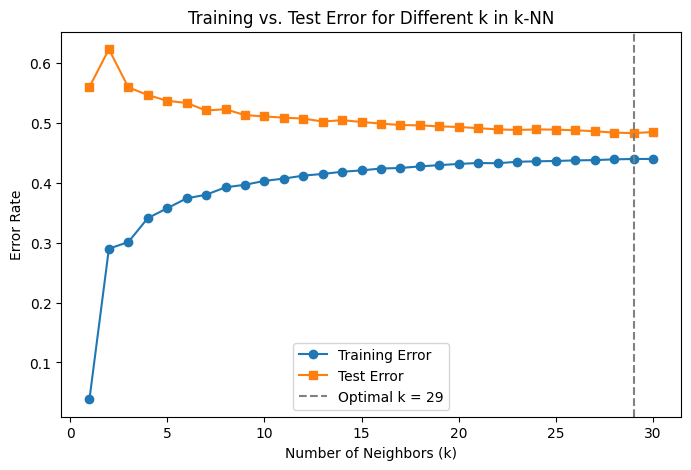

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("../data/KNN_data/KNN_cleaned_data.csv")

# Encode categorical features (assuming they are categorical)
categorical_features = ['race', 'age', 'diag_1', 'diag_2', 'diag_3']
df[categorical_features] = df[categorical_features].astype(str).apply(LabelEncoder().fit_transform)

# Encode target variable
label_encoder = LabelEncoder()
df['readmitted'] = label_encoder.fit_transform(df['readmitted'])

# Separate features and target variable
selected_features = ['race', 'age', 'diag_1', 'diag_2', 'diag_3', 'time_in_hospital']
X = df[selected_features]
y = df['readmitted']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = range(1, 31)  # Test different k values
train_errors = []
test_errors = []
print("Entering Loop")
# Train k-NN for each k and compute errors
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_error = 1 - accuracy_score(y_train, knn.predict(X_train))
    test_error = 1 - accuracy_score(y_test, knn.predict(X_test))

    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f"Done with {k}")

# Plot training & test error vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_errors, label="Training Error", marker="o")
plt.plot(k_values, test_errors, label="Test Error", marker="s")

# Highlight the optimal k (smallest test error)
optimal_k = k_values[np.argmin(test_errors)]
plt.axvline(optimal_k, linestyle="--", color="gray", label=f"Optimal k = {optimal_k}")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("Training vs. Test Error for Different k in k-NN")
plt.legend()
plt.show()


DONE
DONE
DONE
DONE
Top 10 Features:
admission_type_id: 0.0179
num_procedures: 0.0231
number_diagnoses: 0.0242
discharge_disposition_id: 0.0258
number_inpatient: 0.0317
time_in_hospital: 0.0332
num_medications: 0.0416
num_lab_procedures: 0.0439
encounter_id: 0.0532
patient_nbr: 0.0534


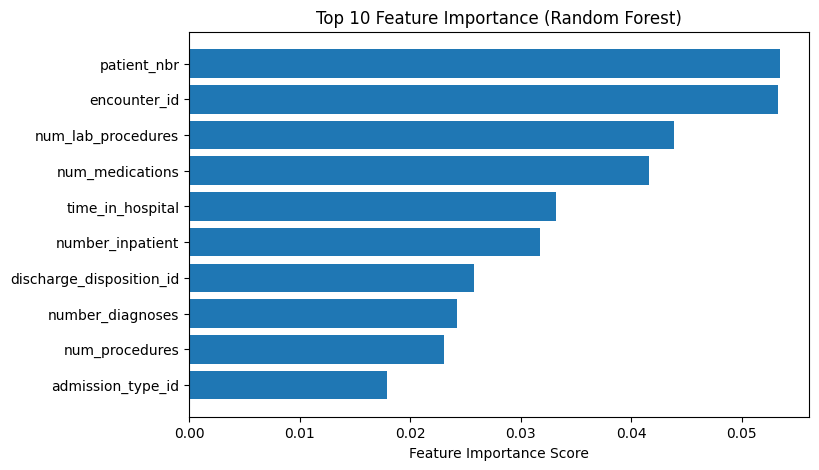

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("../data/KNN_data/KNN_cleaned_data.csv")

# Encode target variable
label_encoder = LabelEncoder()
df['readmitted'] = label_encoder.fit_transform(df['readmitted'])

# Separate features and target variable
X = df.drop(columns=['readmitted'])  # Features
y = df['readmitted']  # Target

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Fill missing values
X.fillna(X.mean(), inplace=True)

# Save feature names before scaling
original_feature_names = X.columns  # Save these before transformation

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print("DONE")
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("DONE")
# Apply PCA to reduce dimensions while retaining 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("DONE")
# Train a Random Forest for feature importance approximation
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Train on original (not PCA-reduced) data

print("DONE")

# Extract feature importances
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)

# Ensure feature names match importances
feature_names = np.array(original_feature_names)  # Use original names before PCA

# Print top 10 features with highest importance
print("Top 10 Features:")
top_10_idx = sorted_idx[-10:]  # Get indices of top 10 important features
top_10_importances = importances[top_10_idx]
top_10_features = feature_names[top_10_idx]

for feature, importance in zip(top_10_features, top_10_importances):
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(range(len(top_10_idx)), top_10_importances, align="center")
plt.yticks(range(len(top_10_idx)), top_10_features)  # Display only top 10 features
plt.xlabel("Feature Importance Score")
plt.title("Top 10 Feature Importance (Random Forest)")
plt.show()
